In [118]:
import pytesseract
import cv2

In [52]:
pwd

'C:\\Users\\Soham'

In [ ]:
img=cv2.imread('image1.png')
cv2.imshow('sample image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
text=pytesseract.image_to_string(img)
print(text)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('student.csv')

In [3]:
dataset.shape

(200, 2)

In [5]:
dataset.head()

,Hours,Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
dataset.fillna(dataset.mean(),axis=0)

,Hours,Marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [7]:
dataset.describe()

,Hours,Marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [8]:
dataset.isnull().sum()

Hours    5
Marks    0
dtype: int64

In [5]:
dataset['Hours']=dataset['Hours'].fillna(dataset['Hours'].mean())

In [57]:
dataset.isnull().sum()

Hours    0
Marks    0
dtype: int64

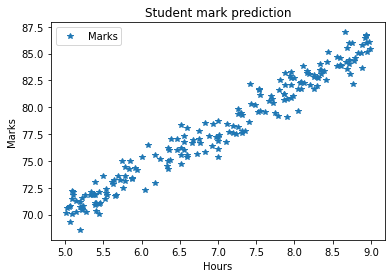

In [11]:
dataset.plot(x='Hours',y='Marks',style="*")
plt.title('Student mark prediction')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

<AxesSubplot:>

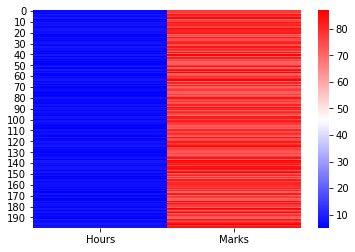

In [17]:
import seaborn as sns
sns.heatmap(dataset,square=False,cmap='bwr')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

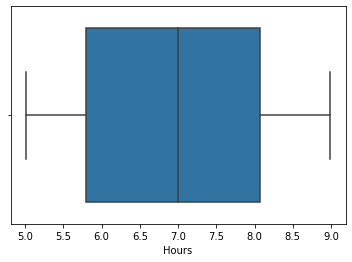

In [18]:

sns.boxplot(dataset['Hours'])

In [ ]:
import seaborn as sns
sns.boxplot(dataset['Marks'])

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
sc=MinMaxScaler()

In [6]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [59]:
y[:5]

array([78.5 , 76.74, 78.68, 71.82, 84.19])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [8]:
x_train_sc=sc.fit_transform(x_train)

NameError: name 'sc' is not defined

In [66]:
x_test_sc=sc.transform(x_test)

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
r1=LinearRegression()

In [12]:
r1.fit(x_train,y_train)

LinearRegression()

In [13]:
print(r1.coef_)
print(r1.intercept_)

[3.90063309]
50.63364037383799


In [14]:
y_pred=r1.predict(x_test)

In [15]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred},index=None)

In [16]:
df.head()

,Actual,Predicted
0,75.39,77.922269
1,80.43,80.746528
2,82.68,81.643673
3,84.68,84.023060
4,69.27,70.409850


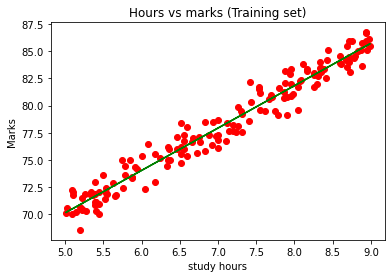

In [17]:


plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, r1.predict(x_train), color = "green")
plt.title("Hours vs marks (Training set)")
plt.xlabel("study hours")
plt.ylabel("Marks")
plt.show()

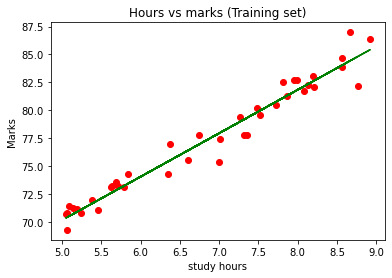

In [18]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, r1.predict(x_test), color = "green")
plt.title("Hours vs marks (Training set)")
plt.xlabel("study hours")
plt.ylabel("Marks")
plt.show()

In [81]:
import joblib

In [82]:
joblib.dump(r1,"lin_regression_model.pk1")

['lin_regression_model.pk1']

In [83]:
model=joblib.load("lin_regression_model.pk1")

In [85]:
model.predict(x_test_sc)

array([77.92226947, 80.74652786, 81.64367348, 84.02305966, 70.40985016,
       76.96291376, 82.15075578, 82.61883175, 79.14726829, 79.30329362,
       82.34578743, 72.82824268, 79.81037592, 82.57982542, 71.61904642,
       72.63321103, 79.96640124, 75.40266052, 72.55519836, 70.68289448,
       73.21830599, 84.02305966, 70.48786282, 84.41312297, 70.87792613,
       70.40985016, 71.07295779, 73.41333765, 78.95223664, 81.09758484,
       81.2926165 , 76.3778188 , 70.3318375 , 84.80318628, 75.51967952,
       77.97707837, 81.7996988 , 71.93109707, 85.42728758, 72.94526167])

In [90]:
cor=dataset.corr()
cor

,Hours,Marks
Hours,1.000000,0.978696
Marks,0.978696,1.000000


<AxesSubplot:>

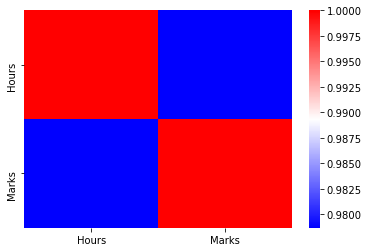

In [92]:
import seaborn as sns
sns.heatmap(cor,cmap='bwr')

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
r2_score(y_pred=y_pred,y_true=y_test)

0.95850944546402

In [23]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

1.04391624108839

In [24]:
np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))

1.0217221936947392